<a href="https://colab.research.google.com/github/Prachisoni07/ml/blob/main/yolo_pose_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics opencv-python torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.52M/6.52M [00:00<00:00, 78.4MB/s]


100%|██████████| 5.35M/5.35M [00:00<00:00, 66.3MB/s]



0: 640x640 1 person, 478.5ms
Speed: 25.6ms preprocess, 478.5ms inference, 30.6ms postprocess per image at shape (1, 3, 640, 640)


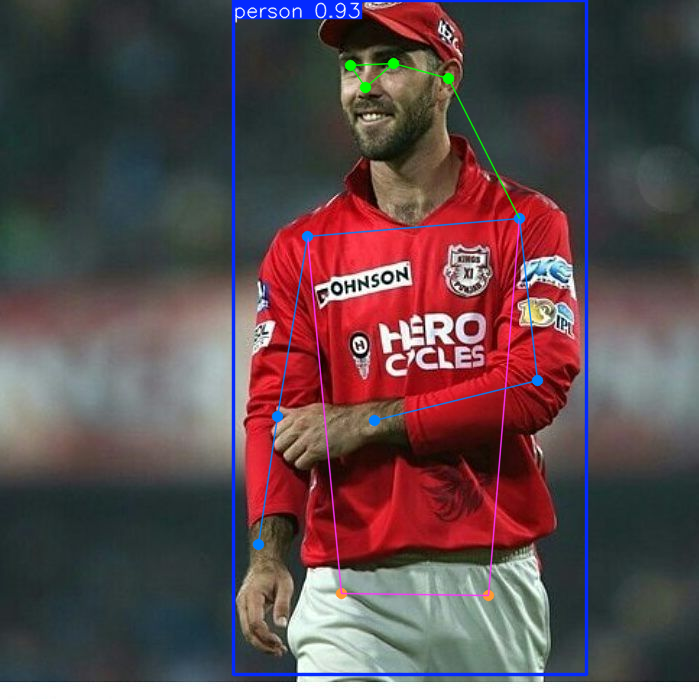

In [2]:
from ultralytics import YOLO
import cv2

model = YOLO("yolov8n-pose.pt")
model1 = YOLO("yolo11n.pt")

image_path = "/content/maxwell.ml2.jpg"
image = cv2.imread(image_path)

results = model(image)

results[0].show()

In [3]:
for r in results:
    print("\nDetected Objects:", len(r.boxes))

    for i, box in enumerate(r.boxes.xyxy.cpu().numpy()):
        print(f"\nPerson {i+1}:")
        print(f"  Bounding Box (x1, y1, x2, y2): {box}")

    keypoints = r.keypoints.xy.cpu().numpy()
    confidence_scores = r.keypoints.conf.cpu().numpy()

    for i, (person_kpts, confs) in enumerate(zip(keypoints, confidence_scores)):
        print(f"\n  Person {i+1} Keypoints:")
        for j, (kpt, conf) in enumerate(zip(person_kpts, confs)):
            print(f"    Keypoint {j+1} (x, y): {kpt} | Confidence: {conf:.2f}")


Detected Objects: 1

Person 1:
  Bounding Box (x1, y1, x2, y2): [      233.9           0      586.28      674.47]

  Person 1 Keypoints:
    Keypoint 1 (x, y): [     365.35      87.136] | Confidence: 1.00
    Keypoint 2 (x, y): [      393.2      63.019] | Confidence: 0.99
    Keypoint 3 (x, y): [     350.99      65.484] | Confidence: 0.97
    Keypoint 4 (x, y): [     448.43      78.714] | Confidence: 0.97
    Keypoint 5 (x, y): [          0           0] | Confidence: 0.40
    Keypoint 6 (x, y): [     519.46      218.37] | Confidence: 1.00
    Keypoint 7 (x, y): [     307.98      236.35] | Confidence: 1.00
    Keypoint 8 (x, y): [     537.91      380.86] | Confidence: 0.97
    Keypoint 9 (x, y): [      277.2      416.97] | Confidence: 0.96
    Keypoint 10 (x, y): [     374.89      420.44] | Confidence: 0.94
    Keypoint 11 (x, y): [     258.01      544.45] | Confidence: 0.87
    Keypoint 12 (x, y): [     488.77      595.35] | Confidence: 0.95
    Keypoint 13 (x, y): [     341.65      5

In [4]:
results = model1.train(data="coco8.yaml", epochs=10)

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=coco8.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=N

100%|██████████| 433k/433k [00:00<00:00, 9.68MB/s]
Unzipping /content/datasets/coco8.zip to /content/datasets/coco8...: 100%|██████████| 25/25 [00:00<00:00, 1670.16file/s]

Dataset download success ✅ (0.5s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 14.4MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /content/datasets/coco8/labels/train... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 501.82it/s]

train: New cache created: /content/datasets/coco8/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/coco8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 942.43it/s]

val: New cache created: /content/datasets/coco8/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.9903      2.268      1.383         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]

                   all          4         17      0.586       0.85      0.849      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.266      1.974      1.613         13        640: 100%|██████████| 1/1 [00:03<00:00,  3.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.84s/it]

                   all          4         17       0.57       0.85      0.848      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.033      1.964       1.21         13        640: 100%|██████████| 1/1 [00:03<00:00,  3.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          4         17      0.596       0.85      0.849       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G     0.9203      1.951      1.345         13        640: 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.45s/it]

                   all          4         17      0.609       0.85      0.849       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      0.973      2.098      1.376         13        640: 100%|██████████| 1/1 [00:03<00:00,  3.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          4         17      0.615       0.85      0.873      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      0.958      2.543      1.409         13        640: 100%|██████████| 1/1 [00:03<00:00,  3.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]

                   all          4         17      0.616       0.85      0.854      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.151      2.062      1.388         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.20s/it]

                   all          4         17      0.633       0.85      0.874      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.002      2.188      1.401         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]

                   all          4         17      0.644       0.85      0.858      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.8048      2.056      1.165         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all          4         17      0.647       0.85      0.859      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.032      1.834      1.197         13        640: 100%|██████████| 1/1 [00:03<00:00,  3.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]

                   all          4         17      0.658       0.85      0.859      0.628



10 epochs completed in 0.019 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]


                   all          4         17      0.594       0.85      0.849       0.65
                person          3         10      0.586        0.6      0.592      0.282
                   dog          1          1      0.551          1      0.995      0.796
                 horse          1          2      0.613          1      0.995      0.674
              elephant          1          2      0.377        0.5      0.521      0.258
              umbrella          1          1      0.576          1      0.995      0.995
          potted plant          1          1      0.858          1      0.995      0.895
Speed: 2.6ms preprocess, 237.7ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train



0: 640x512 1 person, 305.3ms
Speed: 11.5ms preprocess, 305.3ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 512)


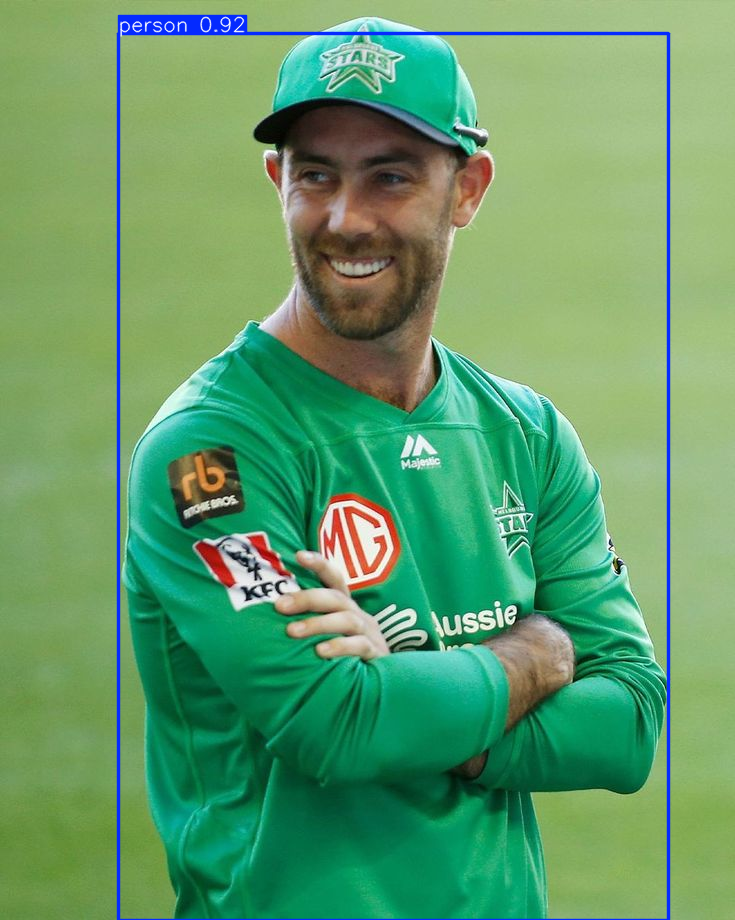

In [5]:
image = cv2.imread("/content/maxwell.ml.jpg")
results = model1(image)
results[0].show()


WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.11/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/bus.jpg: 640x480 4 persons, 1 bus, 309.5ms
image 2/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/zidane.jpg: 384x640 2 persons, 1 tie, 245.3ms
Speed: 8.0ms preprocess, 277.4ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


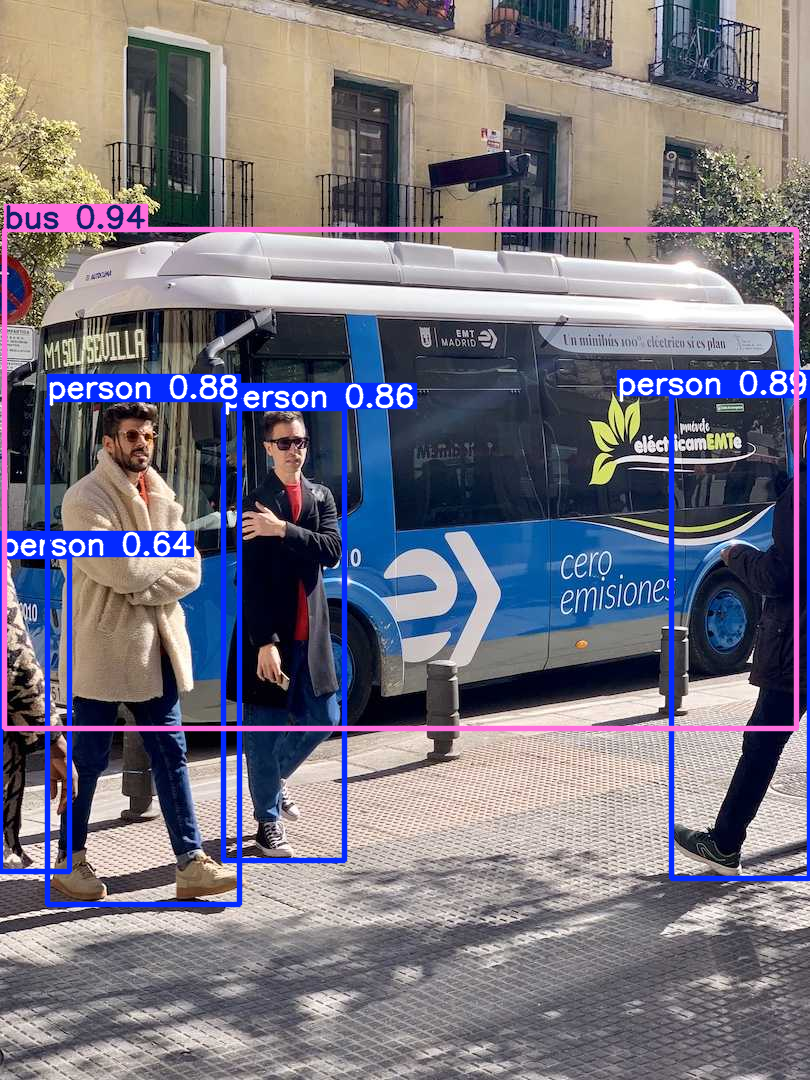

In [6]:
image = cv2.imread("/content/bus.jpg")
results = model1(image)
results[0].show()


0: 448x640 1 bench, 1 dog, 333.9ms
Speed: 4.6ms preprocess, 333.9ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


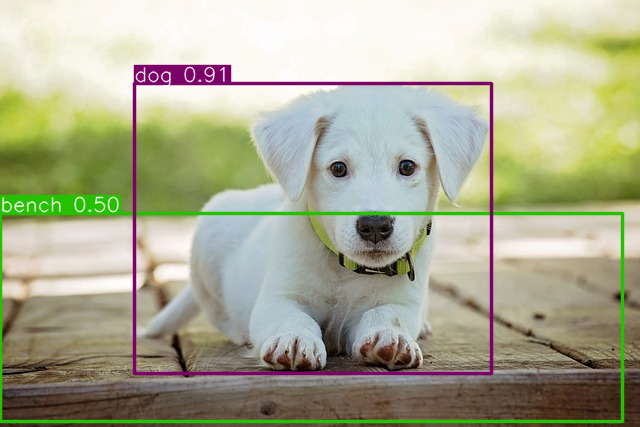

In [7]:
image = cv2.imread("/content/puppy-1903313_640.jpg")
results = model1(image)
results[0].show()

In [15]:
from ultralytics import YOLO

model2 = YOLO("yolo11n-pose.pt")

results = model2.train(data="coco8-pose.yaml", epochs=50, imgsz=640)

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=pose, mode=train, model=yolo11n-pose.pt, data=coco8-pose.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

train: Scanning /content/datasets/coco8-pose/labels/train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/coco8-pose/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

Plotting labels to runs/pose/train2/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/pose/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.503      4.119     0.3952     0.9567      1.542         13        640: 100%|██████████| 1/1 [00:03<00:00,  3.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

                   all          4         14      0.807      0.897      0.913       0.72          1      0.694      0.769      0.365



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.366      4.603     0.4503      1.434      1.424         14        640: 100%|██████████| 1/1 [00:04<00:00,  4.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

                   all          4         14      0.863        0.9      0.917      0.727          1      0.693      0.722      0.364



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.472      4.169     0.5757      1.329      1.554         18        640: 100%|██████████| 1/1 [00:03<00:00,  3.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.41s/it]

                   all          4         14      0.864      0.908      0.913      0.715      0.992      0.643       0.77      0.347



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.107        3.7     0.4297     0.8709       1.16         21        640: 100%|██████████| 1/1 [00:04<00:00,  4.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.40s/it]

                   all          4         14      0.916      0.929      0.921      0.703          1      0.642      0.717      0.311



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.108      2.623     0.2873     0.8075      1.371          7        640: 100%|██████████| 1/1 [00:04<00:00,  4.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

                   all          4         14      0.918      0.929      0.922      0.698          1       0.64      0.711      0.287



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.001       2.16     0.4269     0.6518      1.212         17        640: 100%|██████████| 1/1 [00:04<00:00,  4.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all          4         14      0.918      0.929      0.923      0.682      0.774       0.49      0.516      0.247



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.025      3.015     0.3486     0.7983      1.061         18        640: 100%|██████████| 1/1 [00:03<00:00,  3.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

                   all          4         14      0.921      0.929      0.927      0.671      0.776      0.495      0.511      0.232



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      0.872      2.297     0.3148     0.7627      1.052         17        640: 100%|██████████| 1/1 [00:04<00:00,  4.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all          4         14      0.928      0.927      0.928      0.646      0.702        0.5      0.507      0.217



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G     0.8787      2.051     0.2367     0.7992      1.183         14        640: 100%|██████████| 1/1 [00:03<00:00,  3.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all          4         14          1      0.766      0.916      0.642      0.796      0.571      0.588      0.215



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.046       1.93     0.3227     0.9441      1.342         12        640: 100%|██████████| 1/1 [00:04<00:00,  4.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all          4         14      0.799      0.857      0.878      0.636      0.875      0.498      0.522       0.22



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.309       3.99       0.41      1.232      1.256         18        640: 100%|██████████| 1/1 [00:03<00:00,  3.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all          4         14      0.826      0.714      0.783      0.598      0.648      0.571      0.495      0.191



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G     0.9299      2.486     0.2643     0.5633      1.145         11        640: 100%|██████████| 1/1 [00:04<00:00,  4.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all          4         14      0.755      0.662      0.786      0.593      0.816      0.429      0.449      0.202



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.411      2.903     0.2211     0.9322       1.43          7        640: 100%|██████████| 1/1 [00:04<00:00,  4.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all          4         14          1      0.563      0.773      0.595      0.807      0.429      0.402      0.184



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      0.853      2.855     0.2503     0.5694     0.9377         15        640: 100%|██████████| 1/1 [00:04<00:00,  4.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all          4         14       0.79      0.643      0.803      0.597      0.856      0.424      0.394       0.17



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.452      2.834     0.3453     0.8627      1.168         19        640: 100%|██████████| 1/1 [00:03<00:00,  3.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all          4         14      0.722      0.714      0.777      0.546      0.803      0.357      0.376      0.138



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.072      3.964     0.3149     0.7719      1.135         22        640: 100%|██████████| 1/1 [00:04<00:00,  4.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

                   all          4         14      0.793       0.82      0.804      0.537      0.796      0.357       0.39      0.158



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.7269      2.039     0.2675     0.5083     0.9531         18        640: 100%|██████████| 1/1 [00:03<00:00,  3.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all          4         14       0.58      0.714      0.699        0.5      0.814      0.357      0.412      0.139



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.9333      2.339     0.2738     0.4928      1.117         11        640: 100%|██████████| 1/1 [00:04<00:00,  4.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.59s/it]

                   all          4         14       0.58      0.714      0.699        0.5      0.814      0.357      0.412      0.139



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.9075      2.619     0.3576     0.5941     0.9738         19        640: 100%|██████████| 1/1 [00:03<00:00,  3.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

                   all          4         14      0.976      0.429      0.666       0.51      0.636      0.429      0.416      0.142



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.8711      1.947     0.3282     0.5131      1.047         13        640: 100%|██████████| 1/1 [00:03<00:00,  3.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.86s/it]

                   all          4         14      0.976      0.429      0.666       0.51      0.636      0.429      0.416      0.142



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.9149      3.274     0.3076     0.7172      1.048         16        640: 100%|██████████| 1/1 [00:03<00:00,  3.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all          4         14      0.979      0.429      0.647      0.495      0.815      0.357       0.38      0.129



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.6954      1.843     0.2542     0.5337      0.961         18        640: 100%|██████████| 1/1 [00:03<00:00,  3.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.86s/it]

                   all          4         14      0.979      0.429      0.647      0.495      0.815      0.357       0.38      0.129



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.043      3.577     0.4174     0.8047      1.261         14        640: 100%|██████████| 1/1 [00:03<00:00,  3.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.36s/it]

                   all          4         14      0.976      0.429      0.618      0.478      0.812      0.357      0.377      0.119



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.9684      2.842     0.3282     0.7205      1.149         15        640: 100%|██████████| 1/1 [00:03<00:00,  3.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.17s/it]

                   all          4         14      0.976      0.429      0.618      0.478      0.812      0.357      0.377      0.119



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.175      2.832     0.3286     0.7825      1.365         10        640: 100%|██████████| 1/1 [00:04<00:00,  4.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

                   all          4         14      0.927      0.429      0.657      0.468      0.769      0.357       0.37       0.11



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.9938      3.097     0.2406     0.5087      1.237          8        640: 100%|██████████| 1/1 [00:03<00:00,  3.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]

                   all          4         14      0.927      0.429      0.657      0.468      0.769      0.357       0.37       0.11



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.7177      2.132     0.2865     0.5507        1.1         11        640: 100%|██████████| 1/1 [00:04<00:00,  4.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.40s/it]

                   all          4         14      0.841      0.429      0.543      0.432      0.841      0.429      0.427     0.0971



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.7776      1.918     0.2418     0.5354     0.9448          9        640: 100%|██████████| 1/1 [00:04<00:00,  4.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.68s/it]

                   all          4         14      0.841      0.429      0.543      0.432      0.841      0.429      0.427     0.0971



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.089      2.478     0.3056     0.6566      1.029         12        640: 100%|██████████| 1/1 [00:03<00:00,  3.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

                   all          4         14       0.83      0.429      0.554      0.422      0.832      0.353      0.371      0.078



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.8446      2.021     0.2574     0.5598     0.9847         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.63s/it]

                   all          4         14       0.83      0.429      0.554      0.422      0.832      0.353      0.371      0.078



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.052      3.669     0.3707     0.8207      1.183         12        640: 100%|██████████| 1/1 [00:03<00:00,  3.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all          4         14      0.794      0.429      0.547      0.398       0.83       0.35      0.353      0.079



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.7885      2.085     0.2442     0.4959      1.094          7        640: 100%|██████████| 1/1 [00:03<00:00,  3.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.87s/it]

                   all          4         14      0.794      0.429      0.547      0.398       0.83       0.35      0.353      0.079



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.258      3.133     0.2507     0.8082      1.233         16        640: 100%|██████████| 1/1 [00:03<00:00,  3.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]

                   all          4         14      0.812      0.429      0.563      0.416      0.955      0.286      0.346      0.073



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.8424      3.066      0.322     0.7013      1.018         19        640: 100%|██████████| 1/1 [00:03<00:00,  3.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.90s/it]

                   all          4         14      0.812      0.429      0.563      0.416      0.955      0.286      0.346      0.073



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.8893      3.134     0.2482     0.6489      1.131         15        640: 100%|██████████| 1/1 [00:03<00:00,  3.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all          4         14      0.846      0.429       0.56      0.404      0.771      0.357      0.351     0.0831



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.6902       1.81     0.2722     0.4566     0.9454         13        640: 100%|██████████| 1/1 [00:03<00:00,  3.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.01s/it]

                   all          4         14      0.846      0.429       0.56      0.404      0.771      0.357      0.351     0.0831



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.6369      1.986     0.3931     0.5529      0.998          8        640: 100%|██████████| 1/1 [00:04<00:00,  4.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]

                   all          4         14      0.667      0.429      0.622      0.393       0.99      0.357      0.363      0.111



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.8768      2.507     0.2907     0.6782      1.031         16        640: 100%|██████████| 1/1 [00:04<00:00,  4.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.64s/it]

                   all          4         14      0.667      0.429      0.622      0.393       0.99      0.357      0.363      0.111



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.6253      1.382     0.3532     0.4071     0.9158         12        640: 100%|██████████| 1/1 [00:03<00:00,  3.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all          4         14      0.482      0.571      0.643      0.389      0.977      0.357      0.364      0.138



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.9637      3.159     0.3509     0.7924      1.015         20        640: 100%|██████████| 1/1 [00:03<00:00,  3.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.82s/it]

                   all          4         14      0.482      0.571      0.643      0.389      0.977      0.357      0.364      0.138


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.7242      1.345     0.2402     0.4868     0.9284          7        640: 100%|██████████| 1/1 [00:03<00:00,  3.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.35s/it]

                   all          4         14      0.517      0.613      0.677      0.406      0.974      0.357      0.364      0.138



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.4707      1.183     0.2558     0.3965     0.8738          7        640: 100%|██████████| 1/1 [00:03<00:00,  3.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]

                   all          4         14      0.517      0.613      0.677      0.406      0.974      0.357      0.364      0.138



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.8039       1.88     0.2683     0.6211     0.9468          7        640: 100%|██████████| 1/1 [00:03<00:00,  3.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

                   all          4         14      0.718      0.643       0.71      0.424      0.964      0.357      0.403       0.16



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.6176      1.697     0.2641     0.4371     0.9848          7        640: 100%|██████████| 1/1 [00:03<00:00,  3.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.84s/it]

                   all          4         14      0.718      0.643       0.71      0.424      0.964      0.357      0.403       0.16



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G      0.771       1.71     0.2762     0.5871      1.067          7        640: 100%|██████████| 1/1 [00:03<00:00,  3.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all          4         14      0.763      0.643       0.76       0.44      0.967      0.357      0.417      0.172



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.6993      2.334     0.2711     0.5562      1.051          7        640: 100%|██████████| 1/1 [00:03<00:00,  3.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.59s/it]

                   all          4         14      0.763      0.643       0.76       0.44      0.967      0.357      0.417      0.172



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.6301       1.25     0.2381      0.434     0.9766          7        640: 100%|██████████| 1/1 [00:03<00:00,  3.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.28s/it]

                   all          4         14      0.838      0.643      0.765      0.443      0.977      0.357      0.411      0.172



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.5481      1.294     0.2689     0.4607       0.93          7        640: 100%|██████████| 1/1 [00:03<00:00,  3.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.40s/it]

                   all          4         14      0.838      0.643      0.765      0.443      0.977      0.357      0.411      0.172



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.5267      1.384     0.3496     0.4155     0.9284          7        640: 100%|██████████| 1/1 [00:03<00:00,  3.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all          4         14      0.877      0.643      0.788      0.459       0.98      0.357      0.417      0.173



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.6178      1.281     0.2483     0.3962      1.004          7        640: 100%|██████████| 1/1 [00:03<00:00,  3.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

                   all          4         14      0.877      0.643      0.788      0.459       0.98      0.357      0.417      0.173



50 epochs completed in 0.091 hours.
Optimizer stripped from runs/pose/train2/weights/last.pt, 6.1MB
Optimizer stripped from runs/pose/train2/weights/best.pt, 6.1MB

Validating runs/pose/train2/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n-pose summary (fused): 257 layers, 2,866,468 parameters, 0 gradients, 7.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.50s/it]


                   all          4         14      0.863      0.899      0.917      0.727          1      0.692      0.722      0.364
Speed: 3.2ms preprocess, 359.0ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/pose/train2


WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.11/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/bus.jpg: 640x480 4 persons, 239.1ms
image 2/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/zidane.jpg: 384x640 2 persons, 180.3ms
Speed: 5.7ms preprocess, 209.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


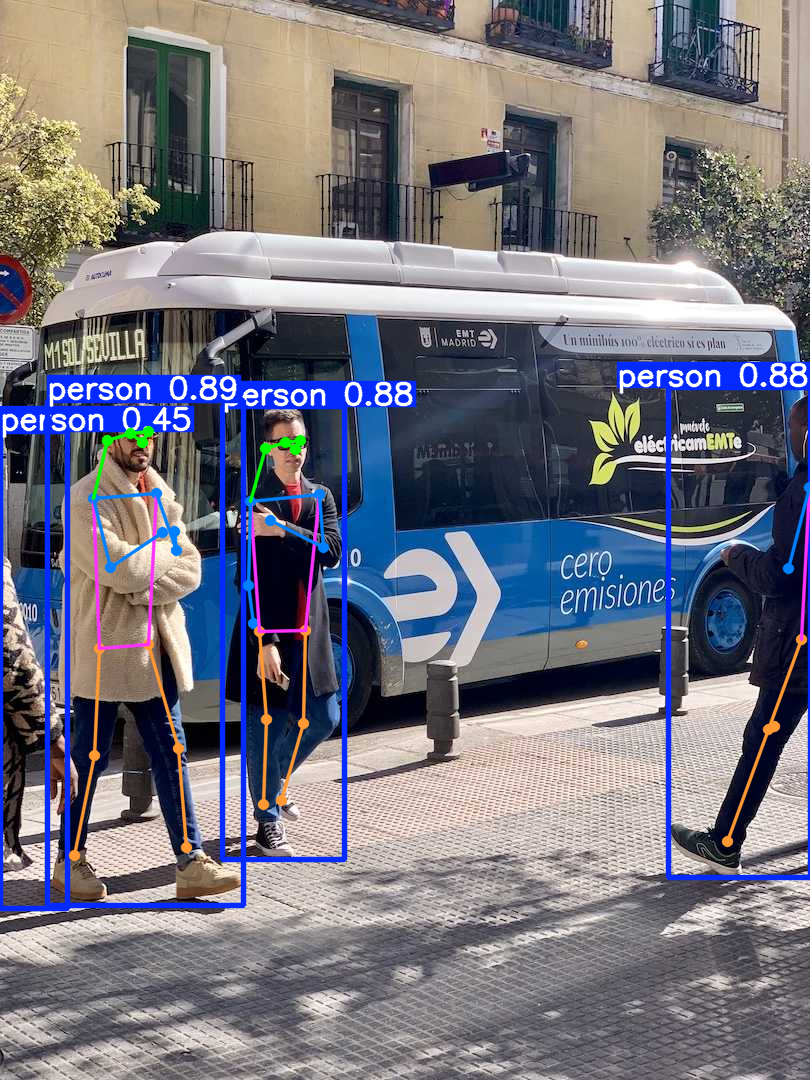

In [17]:
image = cv2.imread("/content/bus.jpg")
results = model2(image)
results[0].show()

In [12]:
from ultralytics import YOLO

model3 = YOLO("yolo11n-seg.yaml")
model3 = YOLO("yolo11n-seg.pt")
model3 = YOLO("yolo11n-seg.yaml").load("yolo11n.pt")

results = model3.train(data="coco8-seg.yaml", epochs=50, imgsz=640)

100%|██████████| 5.90M/5.90M [00:00<00:00, 69.1MB/s]


Transferred 499/561 items from pretrained weights
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.yaml, data=coco8-seg.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=yolo11n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fal

100%|██████████| 439k/439k [00:00<00:00, 10.6MB/s]
Unzipping /content/datasets/coco8-seg.zip to /content/datasets/coco8-seg...: 100%|██████████| 25/25 [00:00<00:00, 1912.76file/s]

Dataset download success ✅ (0.5s), saved to /content/datasets


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1 

 18            [-1, 13]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 19                  -1  1     86720  ultralytics.nn.modules.block.C3k2            [192, 128, 1, False]          
 20                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 21            [-1, 10]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 22                  -1  1    378880  ultralytics.nn.modules.block.C3k2            [384, 256, 1, True]           
 23        [16, 19, 22]  1    717680  ultralytics.nn.modules.head.Segment          [80, 32, 64, [64, 128, 256]]  
YOLO11n-seg summary: 355 layers, 2,876,848 parameters, 2,876,832 gradients, 10.5 GFLOPs

Transferred 561/561 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/segment/train', view at http://localhost:6006/
Freezing layer 'model.23.dfl.conv.weight'


train: Scanning /content/datasets/coco8-seg/labels/train... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 609.06it/s]

train: New cache created: /content/datasets/coco8-seg/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/coco8-seg/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 718.60it/s]

val: New cache created: /content/datasets/coco8-seg/labels/val.cache
Plotting labels to runs/segment/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/segment/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G     0.6574      6.937      2.977      1.112         23        640: 100%|██████████| 1/1 [00:05<00:00,  5.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.32s/it]

                   all          4         17      0.573       0.85      0.878      0.635      0.142      0.167      0.166     0.0332



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.197      7.685      3.017      1.457         22        640: 100%|██████████| 1/1 [00:05<00:00,  5.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.10s/it]

                   all          4         17      0.564       0.85       0.85      0.633      0.141      0.167      0.169       0.05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.141      8.069      2.422      1.324         21        640: 100%|██████████| 1/1 [00:05<00:00,  5.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]

                   all          4         17      0.556       0.85      0.851      0.616      0.139      0.167      0.169     0.0666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.085      8.378      1.983      1.231         36        640: 100%|██████████| 1/1 [00:04<00:00,  4.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.94s/it]

                   all          4         17      0.552       0.85      0.853      0.638      0.138      0.167      0.169     0.0667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.327      7.506      2.963      1.613         20        640: 100%|██████████| 1/1 [00:05<00:00,  5.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.03s/it]

                   all          4         17      0.526       0.85      0.856      0.639      0.137      0.167      0.169     0.0667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.086      7.355      2.919      1.331         39        640: 100%|██████████| 1/1 [00:05<00:00,  5.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.35s/it]

                   all          4         17      0.532       0.85      0.892      0.634      0.136      0.167      0.175     0.0838



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      0.942      8.014      2.668      1.307         24        640: 100%|██████████| 1/1 [00:04<00:00,  4.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.09s/it]

                   all          4         17      0.559       0.85      0.871      0.632      0.149      0.183      0.187     0.0851



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G     0.7279      8.302      2.071      1.126         19        640: 100%|██████████| 1/1 [00:05<00:00,  5.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.95s/it]

                   all          4         17      0.566      0.858      0.859      0.632      0.161        0.2      0.205     0.0869



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G     0.9772      7.524      3.636      1.443         28        640: 100%|██████████| 1/1 [00:04<00:00,  4.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]

                   all          4         17      0.567      0.866       0.86      0.629      0.158        0.2      0.199      0.103



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.182       6.97      3.591      1.592         42        640: 100%|██████████| 1/1 [00:05<00:00,  5.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.93s/it]

                   all          4         17      0.643      0.941       0.91       0.64      0.293       0.45      0.449      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.023      8.232      2.188      1.266         30        640: 100%|██████████| 1/1 [00:05<00:00,  5.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.93s/it]

                   all          4         17      0.778       0.65       0.86      0.635      0.296       0.45      0.449      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G     0.7369      8.002      2.546      1.176         19        640: 100%|██████████| 1/1 [00:04<00:00,  4.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.20s/it]

                   all          4         17      0.777       0.65      0.887      0.643      0.255       0.45      0.476      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.026      7.509       2.52      1.323         20        640: 100%|██████████| 1/1 [00:04<00:00,  4.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.96s/it]

                   all          4         17      0.618      0.776       0.91      0.648      0.245       0.45      0.476       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.015      7.435       2.15      1.294         31        640: 100%|██████████| 1/1 [00:05<00:00,  5.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]

                   all          4         17      0.798       0.65      0.912      0.649      0.447      0.283      0.476      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G     0.8903      7.375      2.206        1.2         30        640: 100%|██████████| 1/1 [00:04<00:00,  4.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.93s/it]

                   all          4         17      0.811       0.65       0.91      0.648      0.459      0.283      0.476      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G     0.7436      7.213      1.743      1.101         23        640: 100%|██████████| 1/1 [00:05<00:00,  5.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.92s/it]

                   all          4         17      0.818       0.65      0.887      0.628      0.468      0.283      0.476      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.031      7.886      2.504      1.231         54        640: 100%|██████████| 1/1 [00:04<00:00,  4.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]

                   all          4         17      0.823       0.65      0.858       0.62      0.472      0.283      0.446       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.9807      7.305      2.401      1.261         31        640: 100%|██████████| 1/1 [00:04<00:00,  4.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.90s/it]

                   all          4         17      0.823       0.65      0.858       0.62      0.472      0.283      0.446       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.8056       8.03      1.516      1.135         26        640: 100%|██████████| 1/1 [00:05<00:00,  5.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.91s/it]

                   all          4         17      0.819       0.65      0.876      0.624      0.477      0.283      0.466      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      0.991      7.622      2.271      1.299         21        640: 100%|██████████| 1/1 [00:04<00:00,  4.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.92s/it]

                   all          4         17      0.819       0.65      0.876      0.624      0.477      0.283      0.466      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.7822       7.17      2.212      1.191         28        640: 100%|██████████| 1/1 [00:05<00:00,  5.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.91s/it]

                   all          4         17      0.828       0.65      0.865      0.622      0.487      0.283      0.458      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.8758      7.649      2.423       1.26         35        640: 100%|██████████| 1/1 [00:04<00:00,  4.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.45s/it]

                   all          4         17      0.828       0.65      0.865      0.622      0.487      0.283      0.458      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.332      7.228      2.788      1.507         18        640: 100%|██████████| 1/1 [00:04<00:00,  4.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.91s/it]

                   all          4         17      0.807      0.653      0.858       0.62      0.479      0.283      0.448      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.8224      7.236      2.101       1.17         26        640: 100%|██████████| 1/1 [00:05<00:00,  5.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.95s/it]

                   all          4         17      0.807      0.653      0.858       0.62      0.479      0.283      0.448      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.102      6.515      2.822      1.322         33        640: 100%|██████████| 1/1 [00:04<00:00,  4.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.42s/it]

                   all          4         17      0.806       0.65      0.857      0.619      0.483      0.283      0.448      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.8273      7.083      2.459      1.229         29        640: 100%|██████████| 1/1 [00:04<00:00,  4.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.96s/it]

                   all          4         17      0.806       0.65      0.857      0.619      0.483      0.283      0.448      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.8788      6.978      2.372      1.212         19        640: 100%|██████████| 1/1 [00:05<00:00,  5.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.09s/it]

                   all          4         17      0.808       0.65      0.857      0.611      0.482      0.283      0.448      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.7048      7.168      1.929      1.104         31        640: 100%|██████████| 1/1 [00:04<00:00,  4.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.00s/it]

                   all          4         17      0.808       0.65      0.857      0.611      0.482      0.283      0.448      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.8511      7.237      2.278      1.238         19        640: 100%|██████████| 1/1 [00:05<00:00,  5.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.96s/it]

                   all          4         17      0.771       0.65      0.857      0.609      0.468      0.283      0.449      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.6451      7.229       1.65      1.107         18        640: 100%|██████████| 1/1 [00:04<00:00,  4.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.75s/it]

                   all          4         17      0.771       0.65      0.857      0.609      0.468      0.283      0.449      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.9213      6.778      1.603      1.252         19        640: 100%|██████████| 1/1 [00:04<00:00,  4.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.02s/it]

                   all          4         17      0.743       0.65      0.771      0.534      0.459      0.283      0.366      0.101



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.8101      7.284      2.581      1.247         13        640: 100%|██████████| 1/1 [00:05<00:00,  5.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

                   all          4         17      0.743       0.65      0.771      0.534      0.459      0.283      0.366      0.101



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G       1.01      6.697      2.163      1.226         47        640: 100%|██████████| 1/1 [00:05<00:00,  5.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]

                   all          4         17      0.714       0.65      0.771       0.53      0.446      0.283      0.366     0.0841



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.7784      6.618      1.601      1.151         25        640: 100%|██████████| 1/1 [00:04<00:00,  4.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.96s/it]

                   all          4         17      0.714       0.65      0.771       0.53      0.446      0.283      0.366     0.0841



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.6897      6.517      1.892      1.119         31        640: 100%|██████████| 1/1 [00:05<00:00,  5.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.93s/it]

                   all          4         17       0.71        0.7      0.771       0.53      0.425      0.283      0.366     0.0841



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.6021      6.305       1.24      1.141         18        640: 100%|██████████| 1/1 [00:04<00:00,  4.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]

                   all          4         17       0.71        0.7      0.771       0.53      0.425      0.283      0.366     0.0841



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.6058      6.763      2.243      1.064         24        640: 100%|██████████| 1/1 [00:05<00:00,  5.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.03s/it]

                   all          4         17      0.675        0.7       0.77      0.539      0.419      0.283      0.367     0.0841



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.6957      6.581      1.644      1.118         31        640: 100%|██████████| 1/1 [00:06<00:00,  6.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]

                   all          4         17      0.675        0.7       0.77      0.539      0.419      0.283      0.367     0.0841



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.8936      6.362      2.226      1.306         33        640: 100%|██████████| 1/1 [00:04<00:00,  4.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]

                   all          4         17      0.683        0.7       0.77      0.544      0.411      0.283      0.367     0.0829



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.6832      6.973      1.749      1.132         20        640: 100%|██████████| 1/1 [00:05<00:00,  5.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]

                   all          4         17      0.683        0.7       0.77      0.544      0.411      0.283      0.367     0.0829


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.7043      7.237       1.01      1.054         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]

                   all          4         17      0.681        0.7       0.77      0.543       0.41      0.283      0.367     0.0828



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.6582      7.175      0.858     0.9573         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.14s/it]

                   all          4         17      0.681        0.7       0.77      0.543       0.41      0.283      0.367     0.0828



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.8021      7.411       1.29      1.016         13        640: 100%|██████████| 1/1 [00:05<00:00,  5.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.04s/it]

                   all          4         17      0.673        0.7      0.771      0.534      0.411      0.283      0.365     0.0813



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.6894      6.372      1.359      1.122         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.25s/it]

                   all          4         17      0.673        0.7      0.771      0.534      0.411      0.283      0.365     0.0813



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.5856      6.162      1.205      1.135         13        640: 100%|██████████| 1/1 [00:05<00:00,  5.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.03s/it]

                   all          4         17      0.666        0.7      0.771      0.512      0.733      0.196       0.28     0.0728



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.7435      6.339       1.26      1.188         13        640: 100%|██████████| 1/1 [00:05<00:00,  5.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.96s/it]

                   all          4         17      0.666        0.7      0.771      0.512      0.733      0.196       0.28     0.0728



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.6898      7.123        1.1      1.057         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.99s/it]

                   all          4         17      0.658        0.7       0.77      0.514      0.751      0.183      0.279     0.0643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.5845      6.623      1.121      1.161         13        640: 100%|██████████| 1/1 [00:05<00:00,  5.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.93s/it]

                   all          4         17      0.658        0.7       0.77      0.514      0.751      0.183      0.279     0.0643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.7179      6.413      1.133      1.206         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.68s/it]

                   all          4         17      0.671        0.7       0.77      0.514      0.568      0.195      0.279     0.0809



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.5986      6.363     0.9596      1.029         13        640: 100%|██████████| 1/1 [00:04<00:00,  4.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.98s/it]

                   all          4         17      0.671        0.7       0.77      0.514      0.568      0.195      0.279     0.0809



50 epochs completed in 0.117 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.1MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.1MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n-seg summary (fused): 265 layers, 2,868,664 parameters, 0 gradients, 10.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.91s/it]


                   all          4         17      0.802       0.65      0.912      0.648      0.451      0.283      0.476      0.156
                person          3         10      0.907        0.4      0.665       0.33      0.453        0.2      0.172      0.051
                   dog          1          1      0.675          1      0.995      0.796      0.675          1      0.995      0.199
                 horse          1          2      0.959          1      0.995      0.649          0          0          0          0
              elephant          1          2      0.579        0.5      0.828      0.323      0.579        0.5      0.695     0.0911
              umbrella          1          1      0.694          1      0.995      0.895          0          0          0          0
          potted plant          1          1          1          0      0.995      0.895          1          0      0.995      0.597
Speed: 2.7ms preprocess, 378.4ms inference, 0.0ms loss, 3.0ms postpro

WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.11/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/bus.jpg: 640x480 4 persons, 1 bus, 314.1ms
image 2/2 /usr/local/lib/python3.11/dist-packages/ultralytics/assets/zidane.jpg: 384x640 2 persons, 1 tie, 249.1ms
Speed: 3.8ms preprocess, 281.6ms inference, 15.3ms postprocess per image at shape (1, 3, 384, 640)


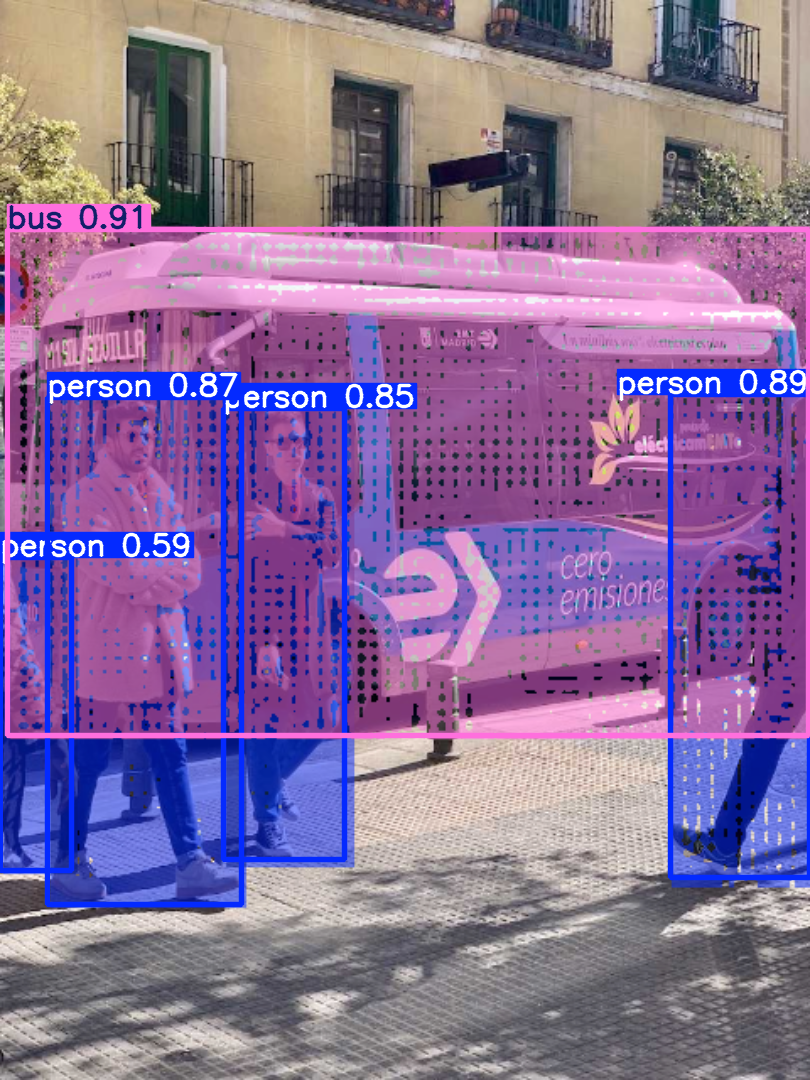

In [14]:
image = cv2.imread("/content/bus.jpg")
results = model3(image)
results[0].show()